In [1]:
import numpy as np
import pandas  as pd
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords

In [2]:
fp = '../feature-importance/data/LIME_features/court_cases/new_feature_l.npy'
sp = '../feature-importance/data/LIME_features/court_cases/new_scores_l.npy'

features = np.load(fp)
scores = np.load(sp,allow_pickle=True)

In [5]:
feature_importance_list = [pd.DataFrame({'word':f.split(' '),'importance':scores[c]}) for c,f in enumerate(features)]
feature_importance_df = pd.concat(feature_importance_list)
feature_importance_df['importance'] = feature_importance_df['importance'].apply(abs)
bert_lime_feature_importance_df = feature_importance_df.groupby('word')['importance'].sum().to_frame().sort_values('importance',ascending=False).reset_index()
# Bert lime cleanup from stopwords
bert_lime_feature_importance_df = bert_lime_feature_importance_df[~bert_lime_feature_importance_df.word.isin(stopwords.words('dutch'))].reset_index(drop=True)

In [6]:
# Bert builtin cleanup
def bert_cleanup(bert_built_in):
    bert_built_in = bert_built_in.copy()
    bert_built_in = bert_built_in[~bert_built_in.FeatureAligned.isin(stopwords.words('dutch')+['.'])].copy()

    bert_built_in_df = bert_built_in.groupby('FeatureAligned')['Importance'].sum().sort_values(ascending=False).to_frame().reset_index()#.iloc[:100,:]['FeatureAligned']
    bert_built_in_df.columns = ['FeatureNames', 'FeatureImportance']
    return bert_built_in_df

In [7]:
bert_built_in = pd.read_csv('../features/'+'bert_1_1_500_words.csv')
bert_shap = pd.read_csv('../features/'+'bert_shap_1_1_500_words.csv')
bert_built_in_df = bert_cleanup(bert_built_in)
bert_shap_df = bert_cleanup(bert_shap)

In [8]:
features.shape,scores.shape

((1227,), (1227,))

In [9]:
ROOT_PATH = '../features/'

svm_builtin = pd.read_csv(ROOT_PATH+'svm_1_1_builtin_500_words.csv')
xgb_builtin = pd.read_csv(ROOT_PATH+'xgb_1_1_builtin_500_words.csv')

In [10]:
svm_lime = pd.read_csv(ROOT_PATH+'svm_1_1_lime_500_words.csv.gz',compression='gzip')
xgb_lime = pd.read_csv(ROOT_PATH+'xgb_1_1_lime_500_words.csv.gz',compression='gzip')

In [11]:
svm_lime.importance = svm_lime.importance.apply(abs)

In [12]:
svm_lime_df = svm_lime.groupby('word')['importance'].sum().sort_values(ascending=False).to_frame().reset_index()
xgb_lime_df = xgb_lime.groupby('word')['importance'].sum().sort_values(ascending=False).to_frame().reset_index()

In [13]:
svm_shap = pd.read_csv(ROOT_PATH+'svm_1_1_shap_500_words.csv.gz',compression='gzip')
xgb_shap = pd.read_csv(ROOT_PATH+'xgb_1_1_shap_500_words.csv.gz',compression='gzip')

In [14]:
svm_shap_df = svm_shap.groupby('word')['importance'].sum().sort_values(ascending=False).to_frame().reset_index()
xgb_shap_df = xgb_shap.groupby('word')['importance'].sum().sort_values(ascending=False).to_frame().reset_index()

In [15]:
def jaccard_similarity(list1, list2):
    s1, s2 = set(list1), set(list2)
    return len(s1 & s2) / len(s1 | s2)

def get_jaccard_sim_df(svm_builtin,xgb_builtin,N=50):
    total_no_of_features = N
    sim = [(N,jaccard_similarity(svm_builtin.iloc[:N,0],xgb_builtin.iloc[:N,0])) for N in range(1,total_no_of_features)]    
    df = pd.DataFrame(sim,columns=['No of Features','Jaccard Similarity'])
    return df

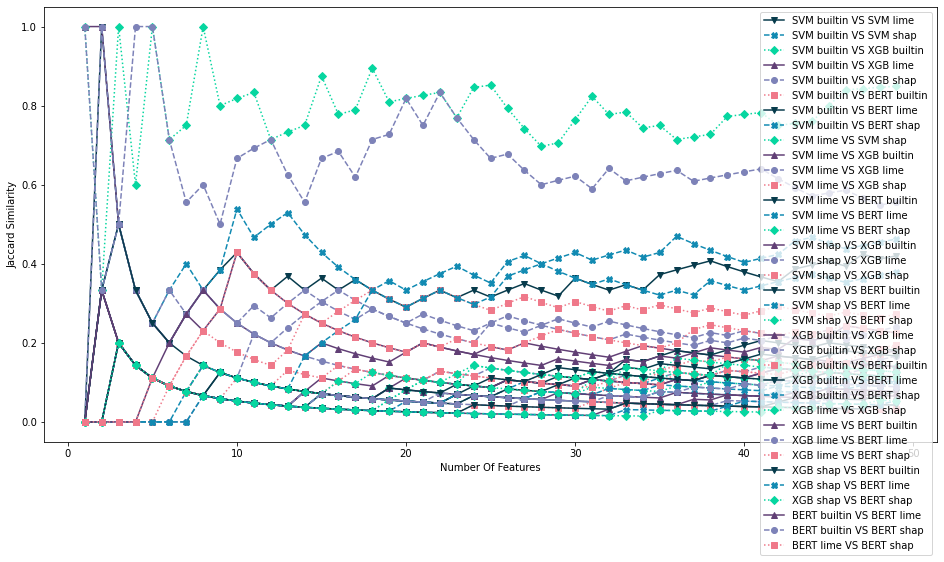

In [16]:
plt.figure(figsize=(16,8))
line_styles= ['-', '--', ':']
colors = ['#073B4C', '#118AB2', '#06D6A0','#613F75', '#7D82B8', '#EF798A']
markers = ['v', 'X', 'D','^', 'o', 's']
model_list = {
    'SVM builtin' : svm_builtin,
    'SVM lime' : svm_lime_df,
    'SVM shap' : svm_shap_df,
    'XGB builtin' : xgb_builtin,
    'XGB lime' : xgb_lime_df,
    'XGB shap' : xgb_shap_df,
    'BERT builtin' : bert_built_in_df,
    'BERT lime' : bert_lime_feature_importance_df,
    'BERT shap' : bert_shap_df,
}
legend = []
counter = 0
pair_completed = []
for df_a_key in model_list.keys():
    for df_b_key in model_list.keys():
        if ((df_a_key, df_b_key) in pair_completed) | ((df_b_key, df_a_key) in pair_completed) : continue
        pair_completed.append((df_a_key, df_b_key))
        df_a,df_b = model_list[df_a_key],model_list[df_b_key]
        if df_a.equals(df_b):continue
        df_jac = get_jaccard_sim_df(df_a,df_b,N=50)
        
        plt.plot(df_jac['No of Features'],df_jac['Jaccard Similarity'],marker = markers[counter%6],linestyle=line_styles[counter%3],color=colors[counter%6])
        # plt.legend()
        legend.append(f'{df_a_key} VS {df_b_key}')
        
#         plt.legend([f'{df_a_key} VS {df_b_key}'])
        # plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
        plt.xlabel('Number Of Features')
        plt.ylabel('Jaccard Similarity')
        counter+=1
plt.legend(legend)

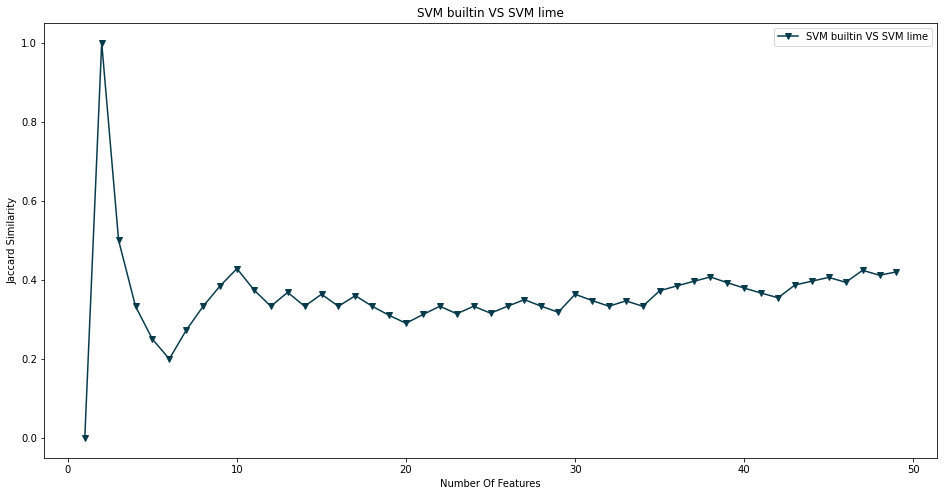

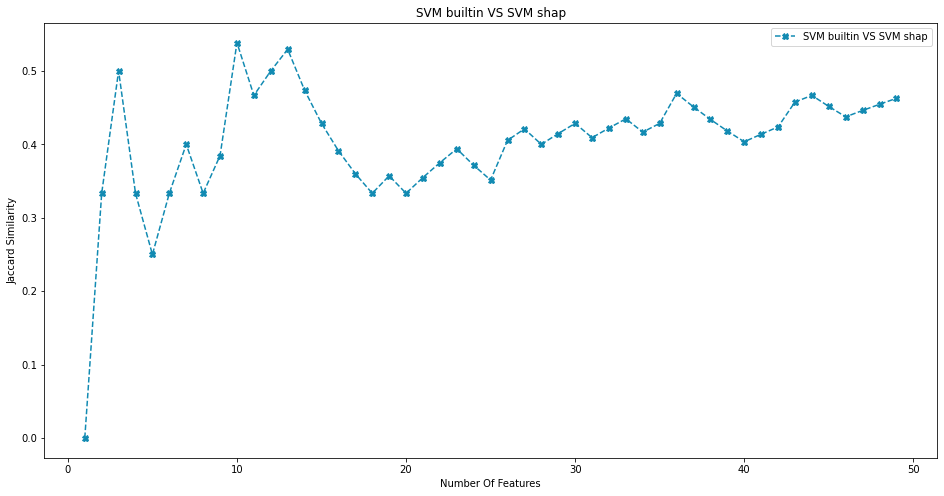

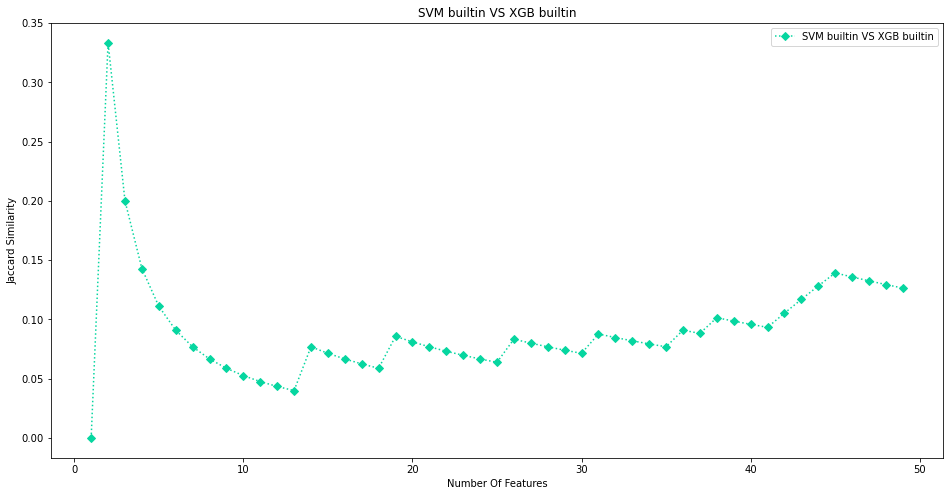

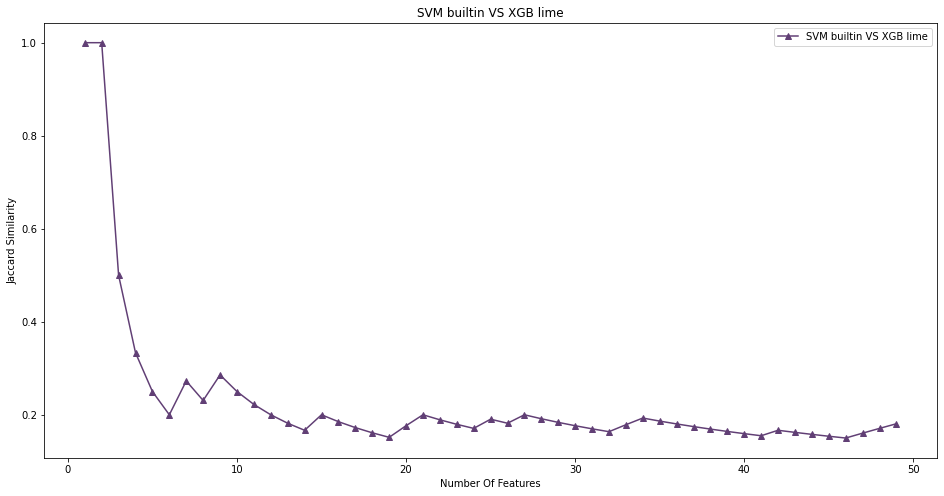

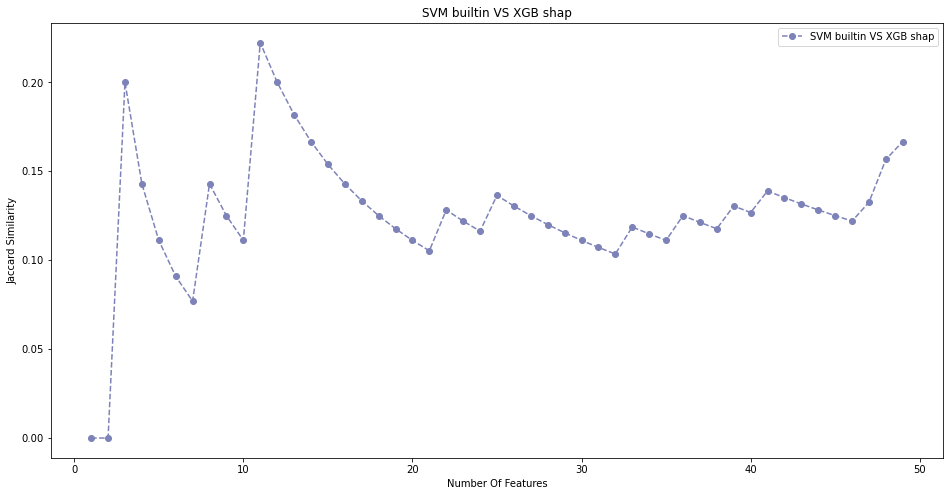

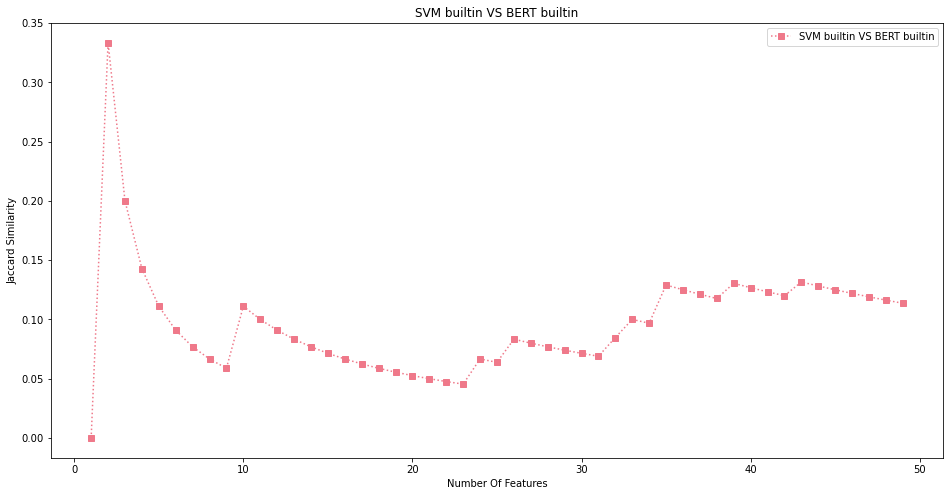

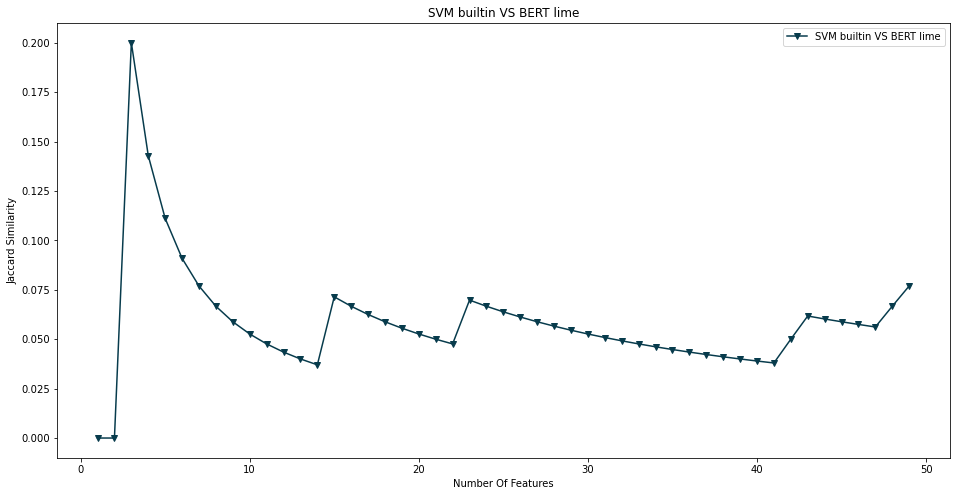

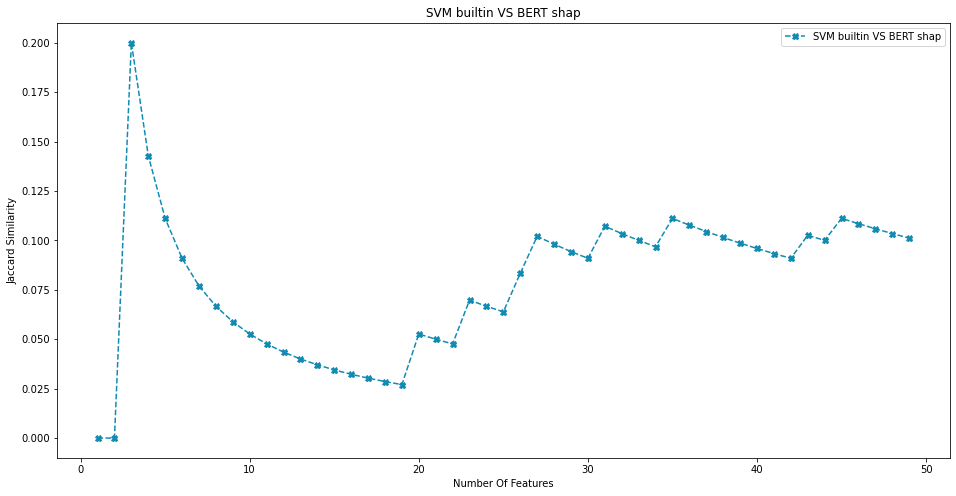

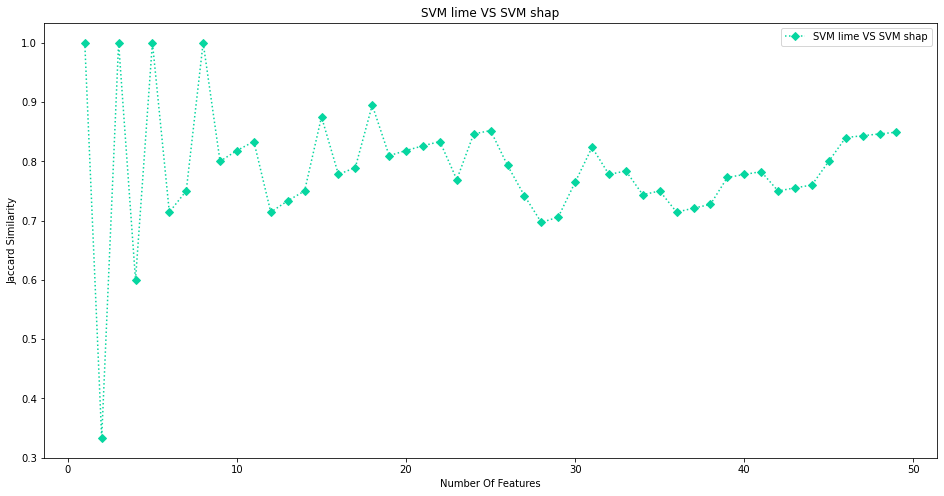

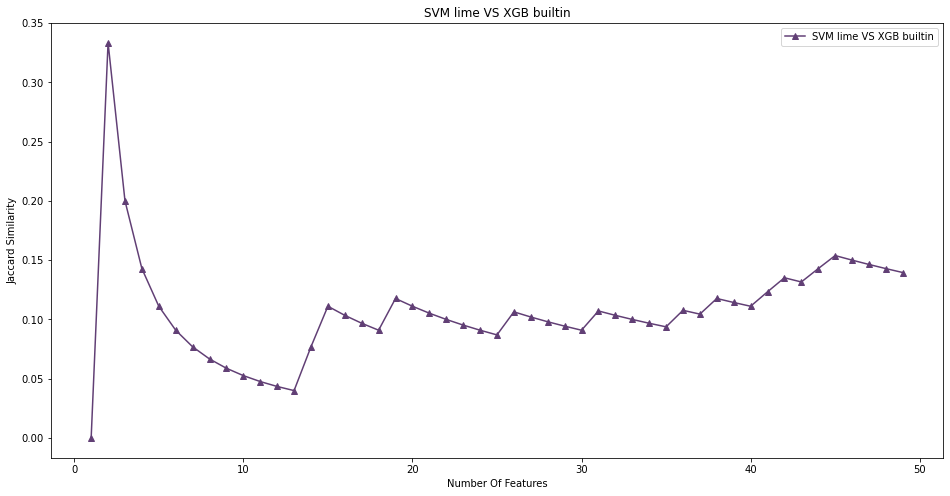

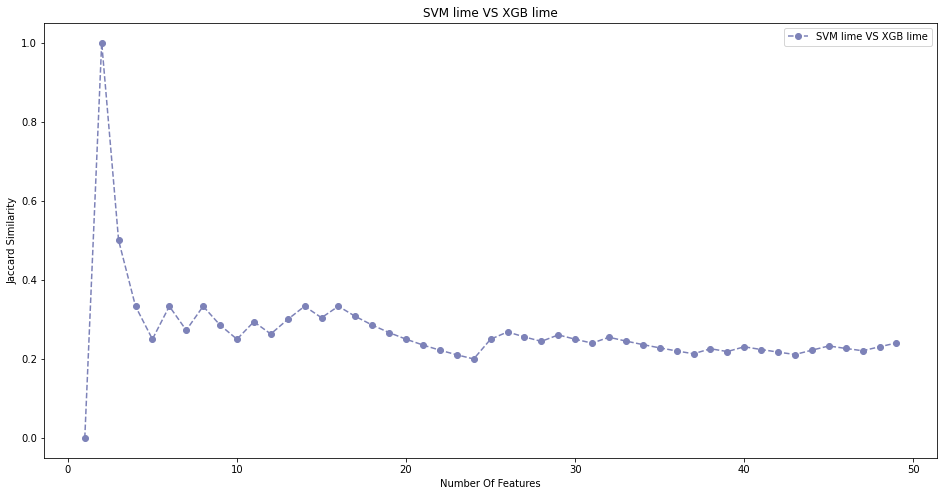

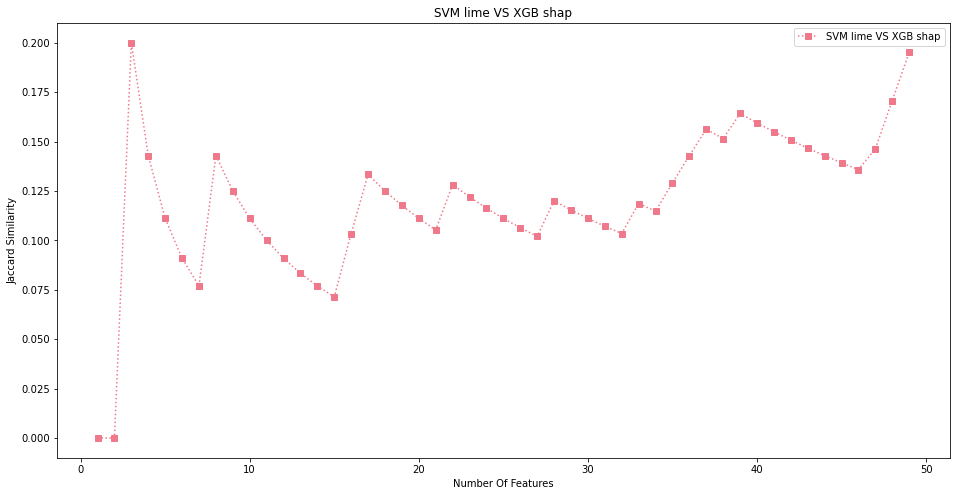

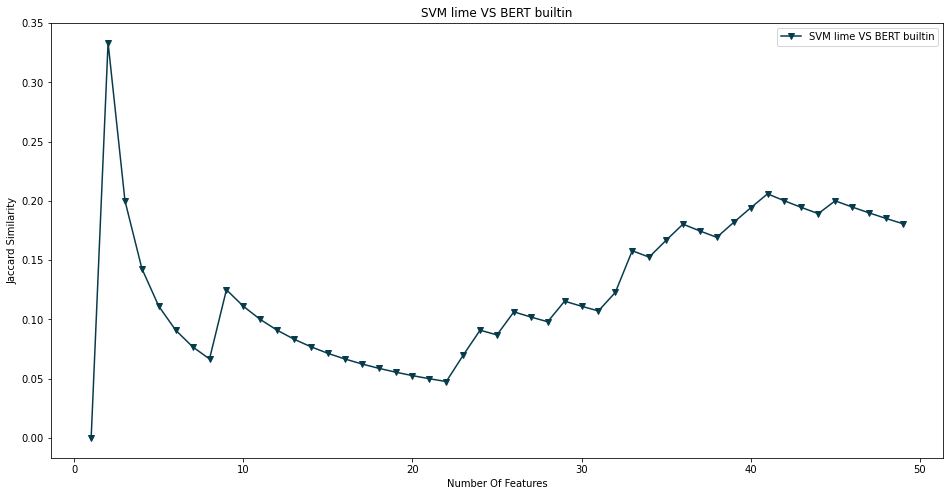

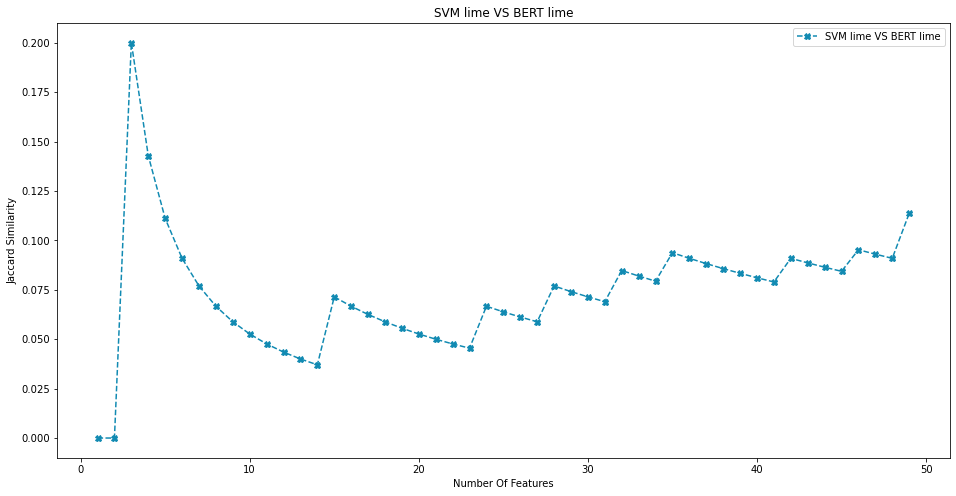

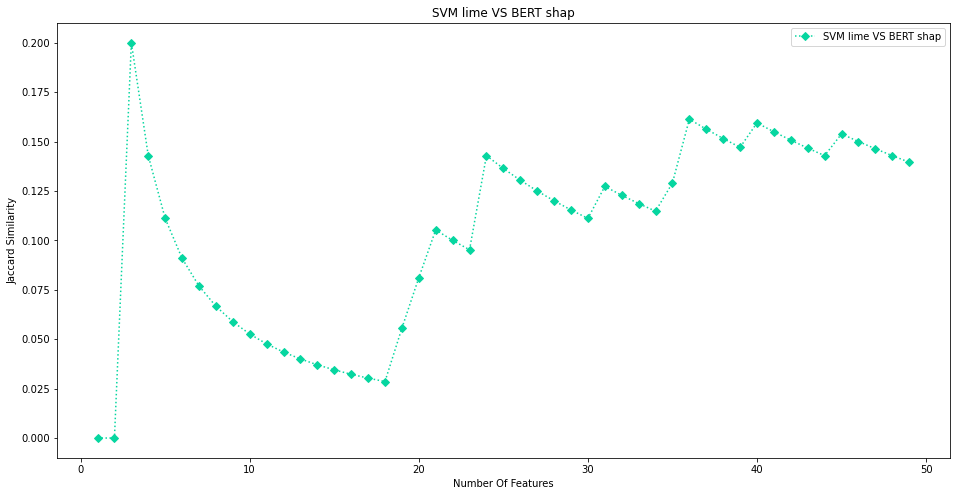

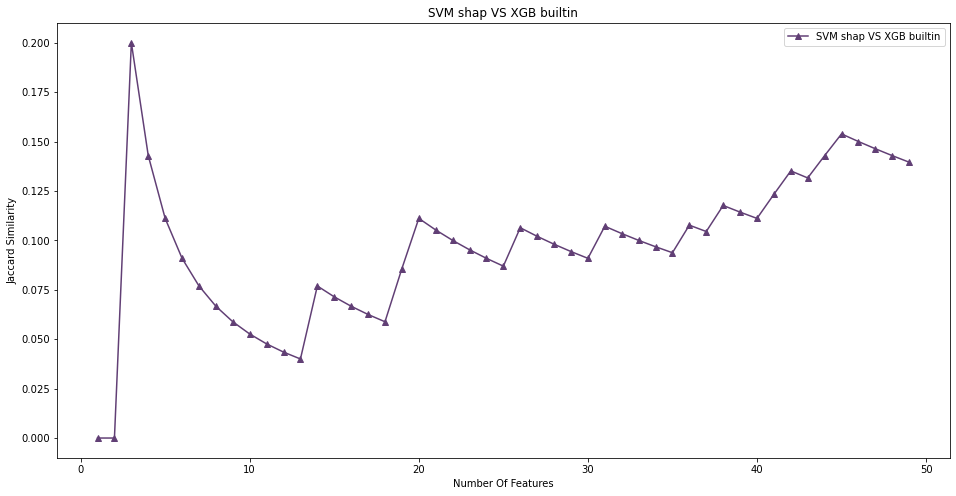

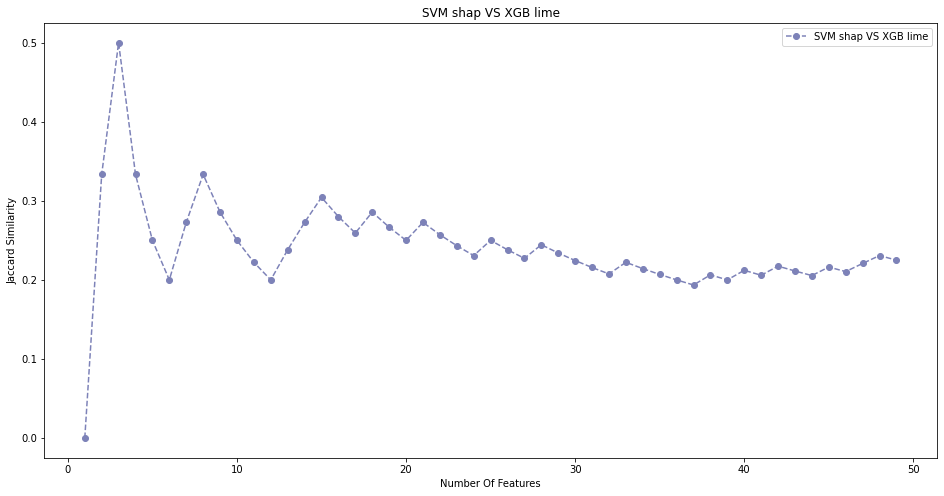

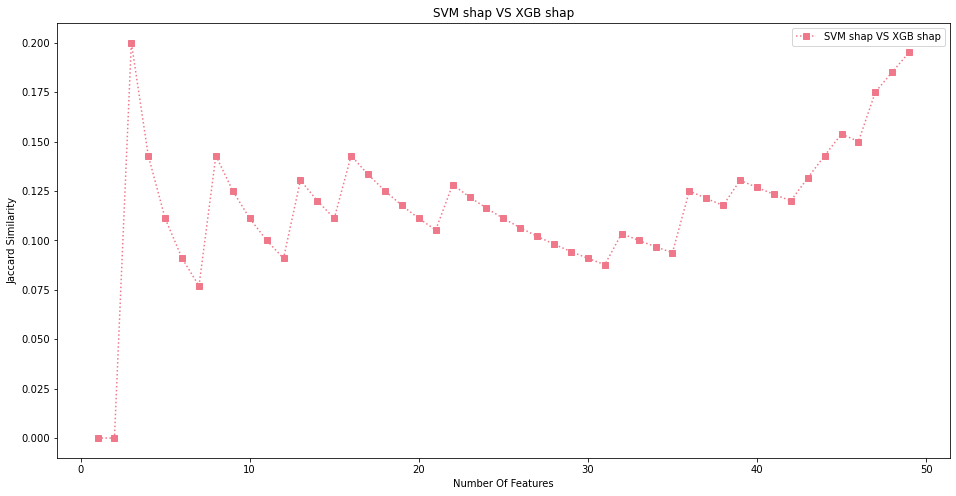

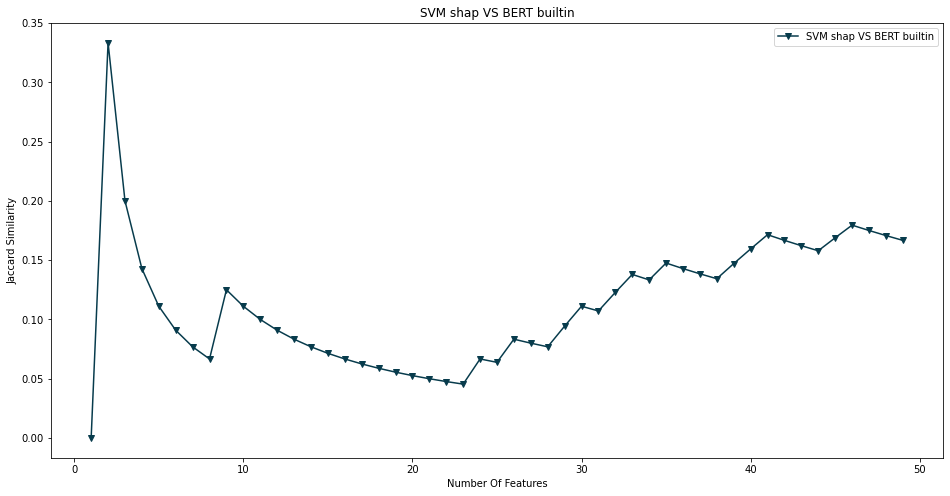

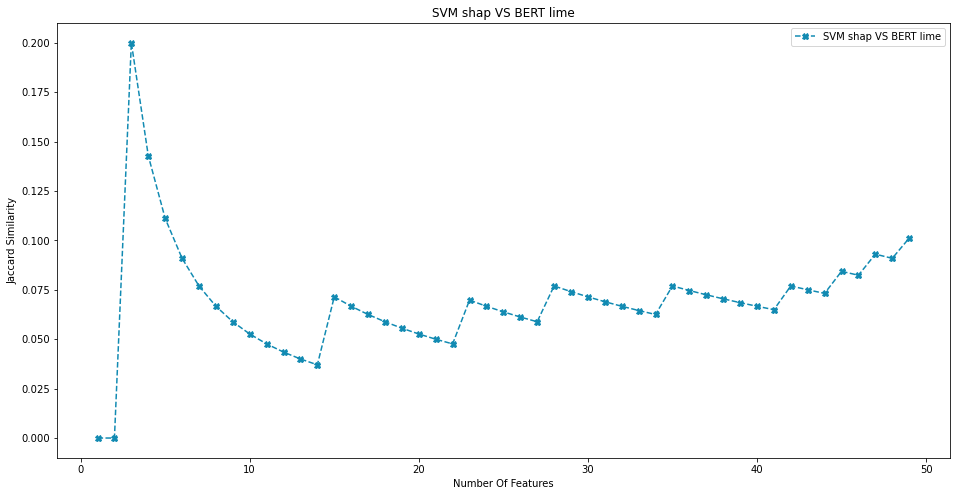

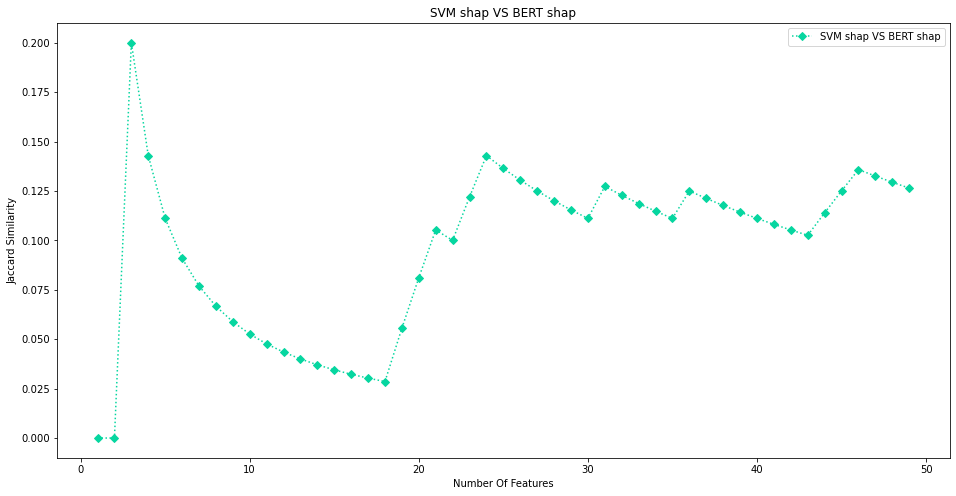

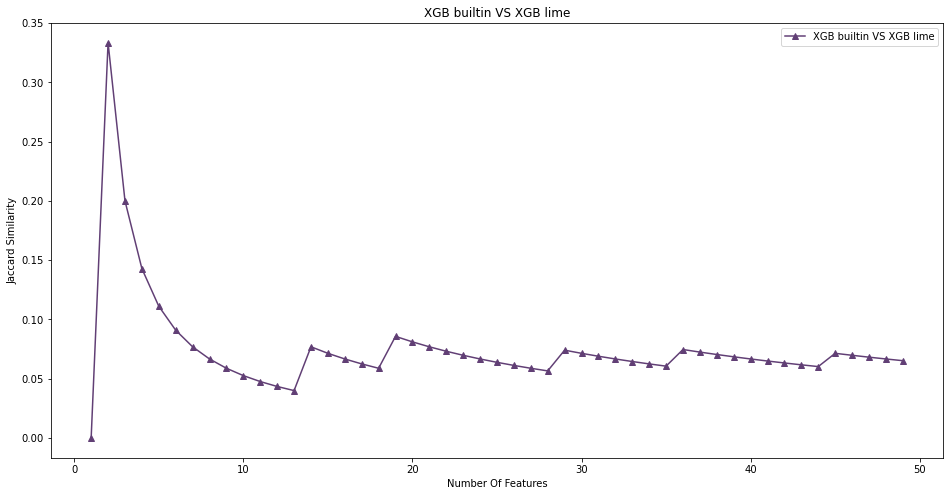

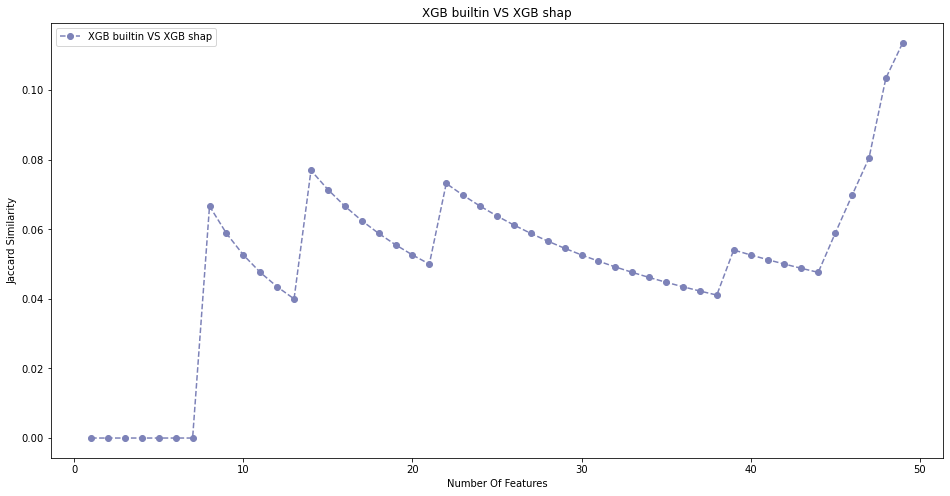

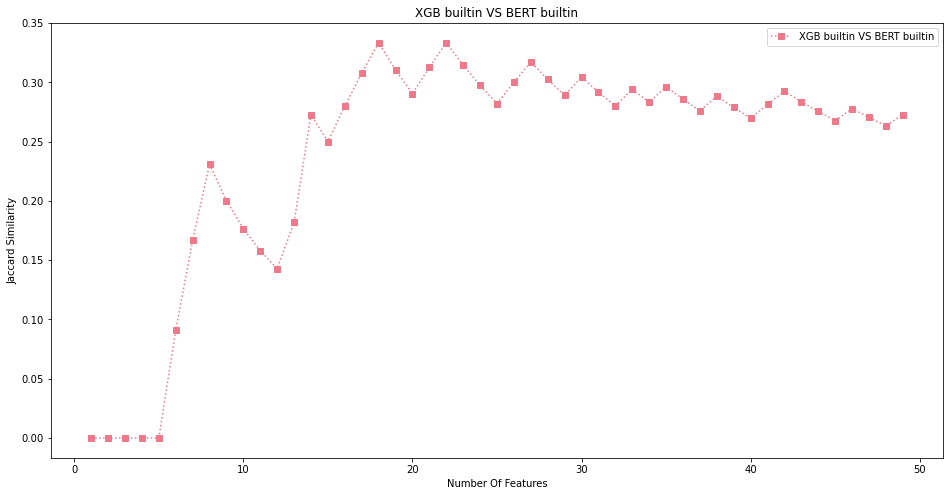

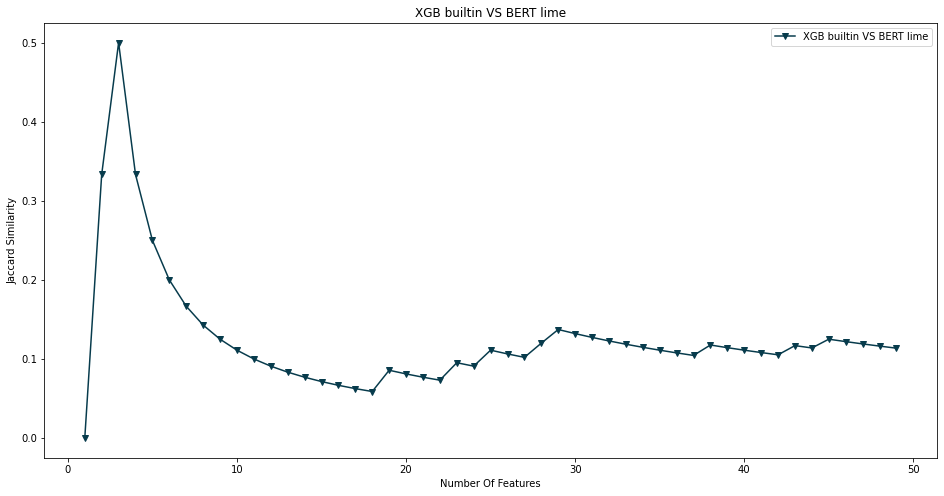

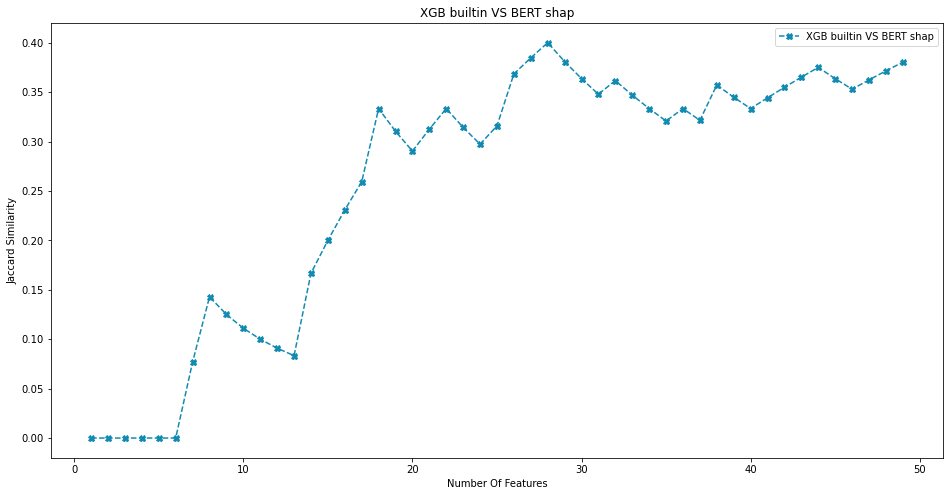

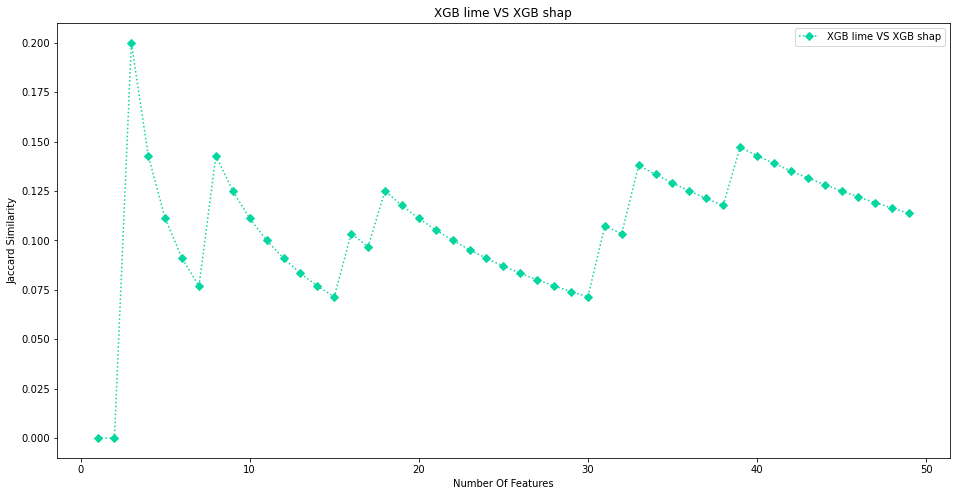

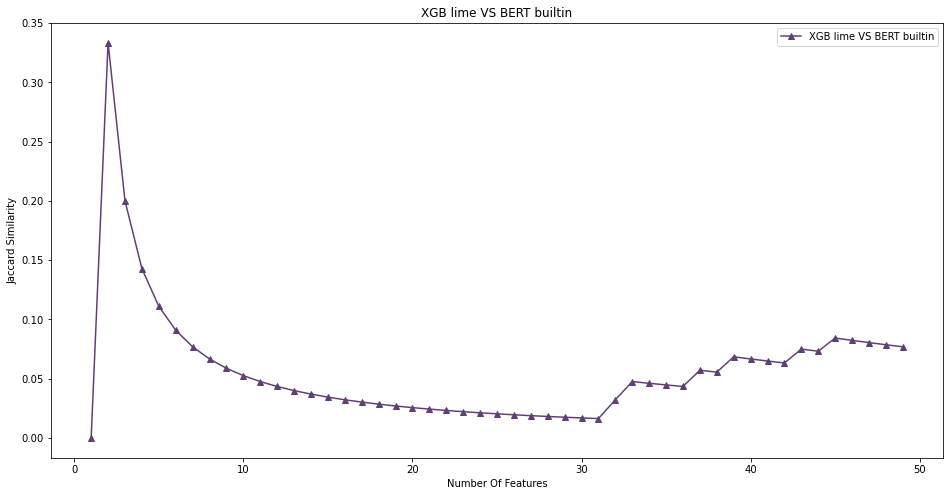

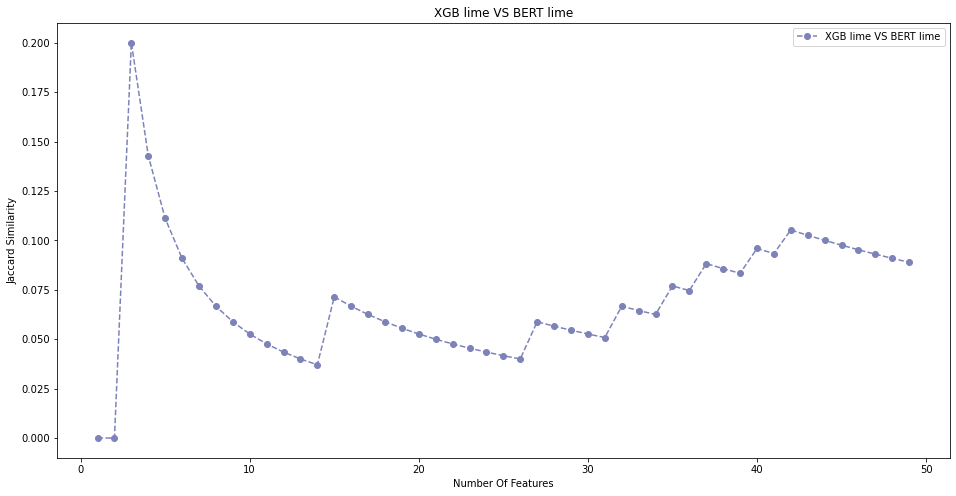

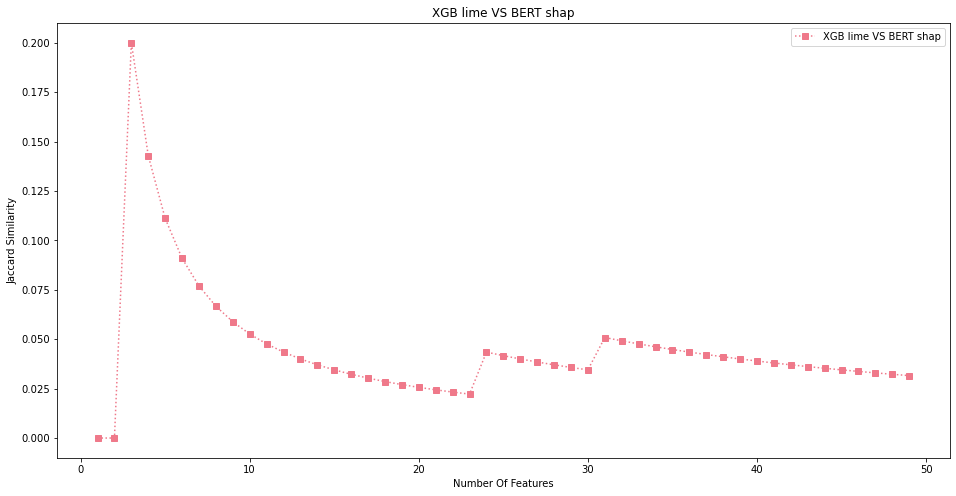

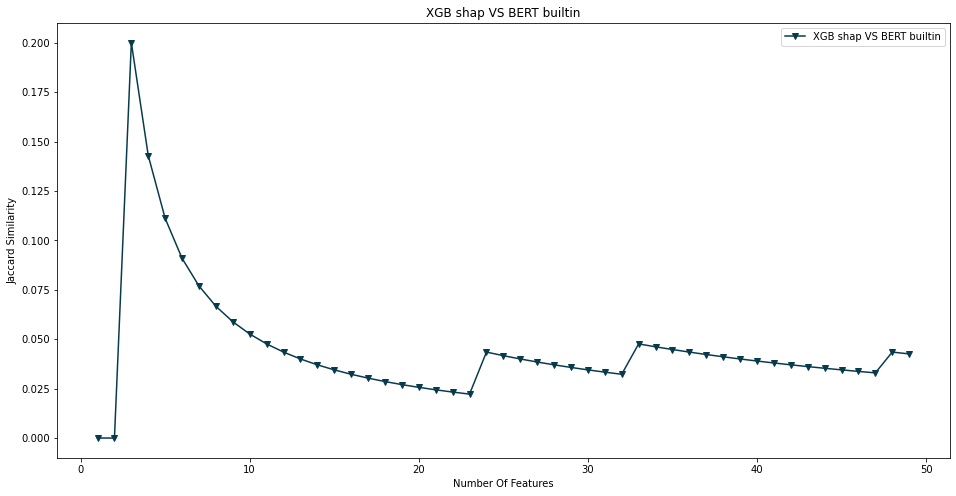

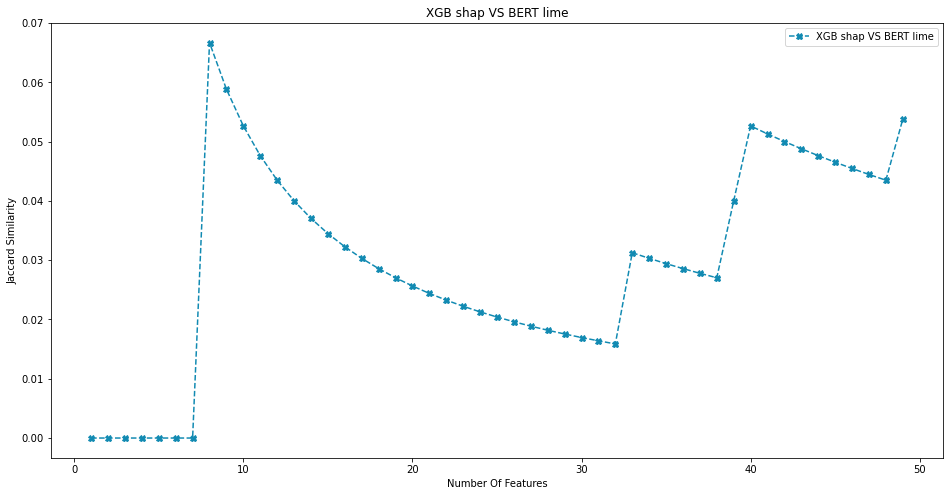

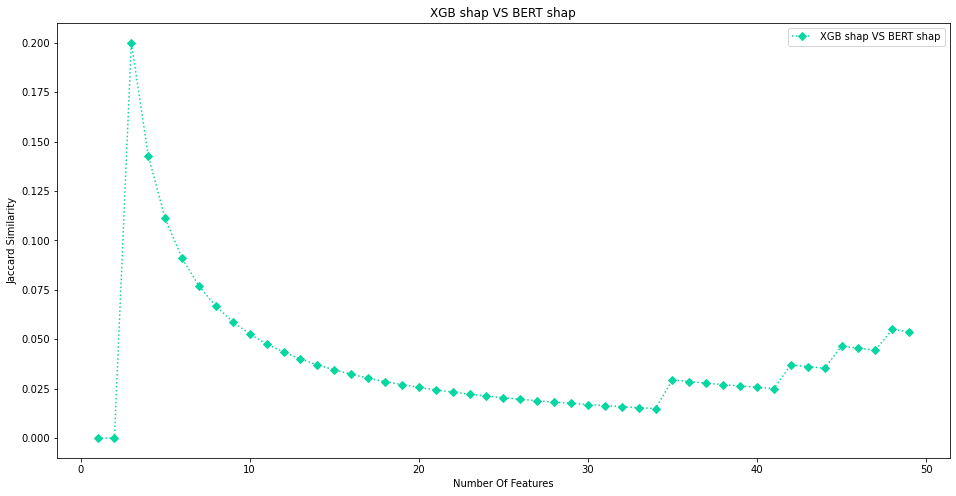

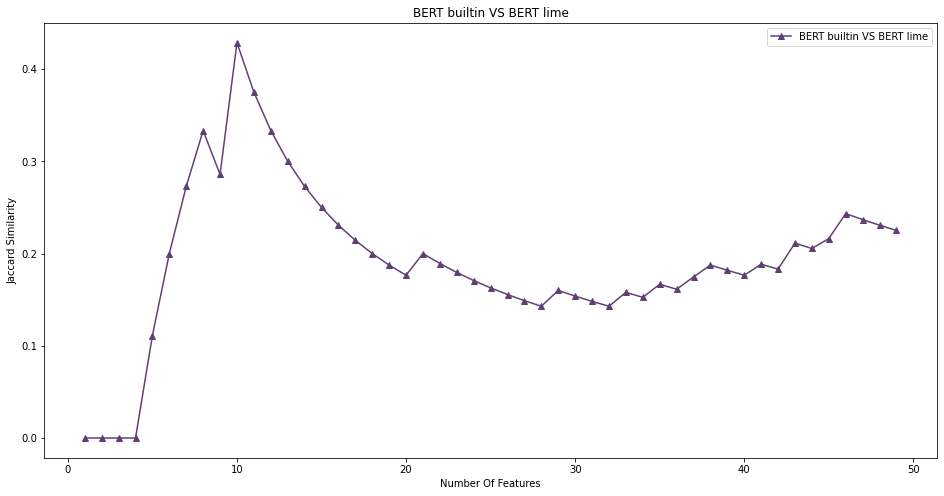

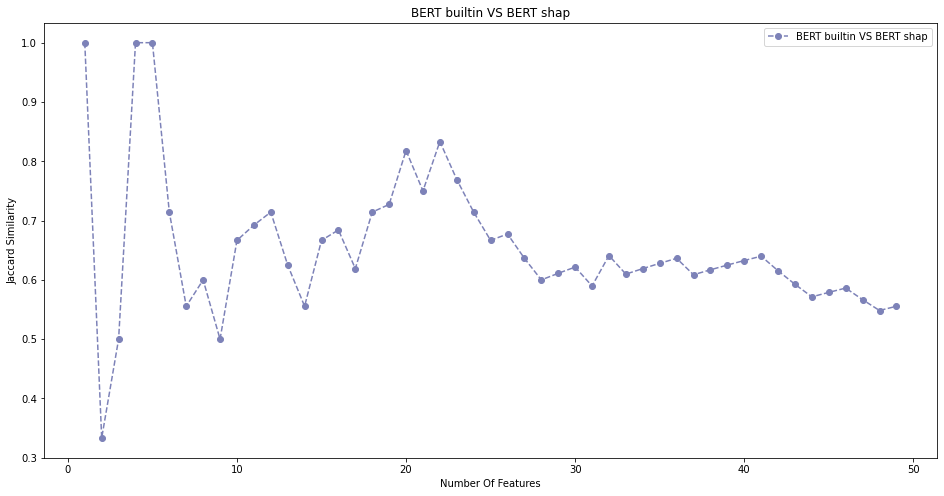

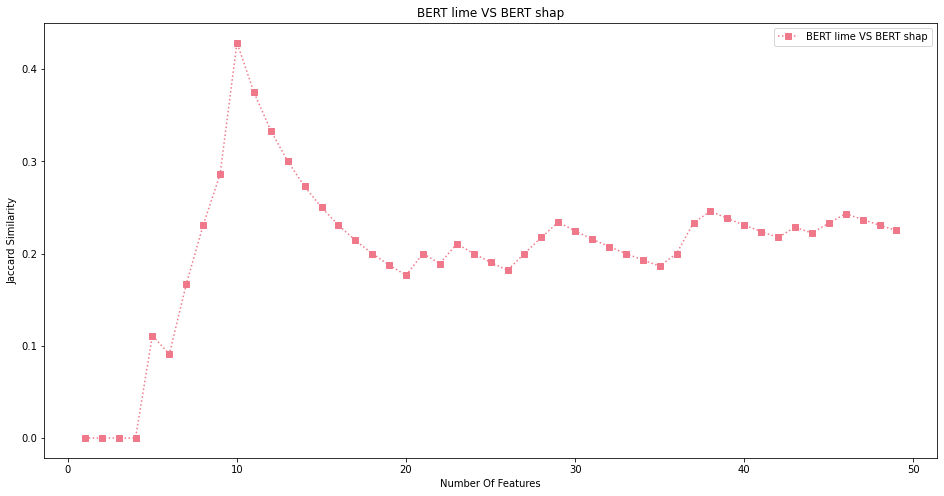

In [17]:
line_styles= ['-', '--', ':']
colors = ['#073B4C', '#118AB2', '#06D6A0','#613F75', '#7D82B8', '#EF798A']
markers = ['v', 'X', 'D','^', 'o', 's']
model_list = {
    'SVM builtin' : svm_builtin,
    'SVM lime' : svm_lime_df,
    'SVM shap' : svm_shap_df,
    'XGB builtin' : xgb_builtin,
    'XGB lime' : xgb_lime_df,
    'XGB shap' : xgb_shap_df,
    'BERT builtin' : bert_built_in_df,
    'BERT lime' : bert_lime_feature_importance_df,
    'BERT shap' : bert_shap_df,
}
legend = []
counter = 0
pair_completed = []
for df_a_key in model_list.keys():
    for df_b_key in model_list.keys():
        if ((df_a_key, df_b_key) in pair_completed) | ((df_b_key, df_a_key) in pair_completed) : continue
        pair_completed.append((df_a_key, df_b_key))
        df_a,df_b = model_list[df_a_key],model_list[df_b_key]
        if df_a.equals(df_b):continue
        df_jac = get_jaccard_sim_df(df_a,df_b,N=50)
        plt.figure(figsize=(16,8))
        plt.plot(df_jac['No of Features'],df_jac['Jaccard Similarity'],marker = markers[counter%6],linestyle=line_styles[counter%3],color=colors[counter%6])
        # plt.legend()
#         legend.append(f'{df_a_key} VS {df_b_key}')
        plt.title(f'{df_a_key} VS {df_b_key}')
        plt.legend([f'{df_a_key} VS {df_b_key}'])
        # plt.legend(bbox_to_anchor=(1.04,0), loc="lower left", borderaxespad=0)
        plt.xlabel('Number Of Features')
        plt.ylabel('Jaccard Similarity')
        counter+=1
#         plt.legend(legend)
        plt.show()

In [21]:
len([(i,j) for i, j in pair_completed if i!=j])

36